In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

## Plotting all features in Dataframe

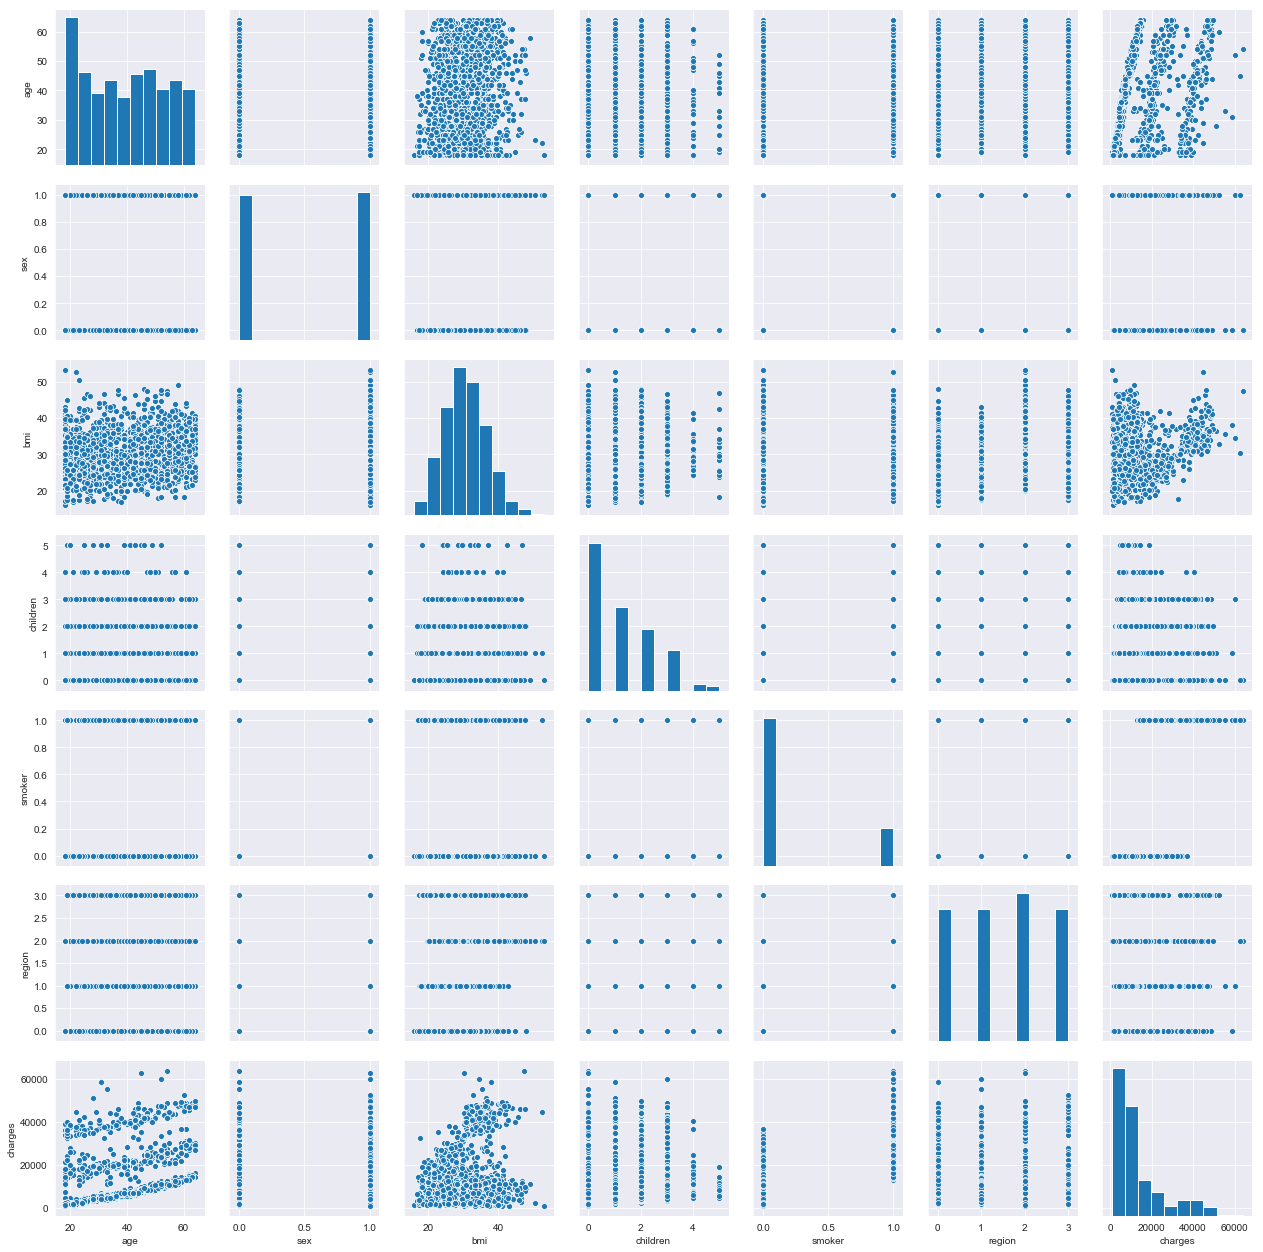

In [11]:
sns.pairplot(data)

## Plotting features showing correlation

### Plotting age to charges and smoker as hue

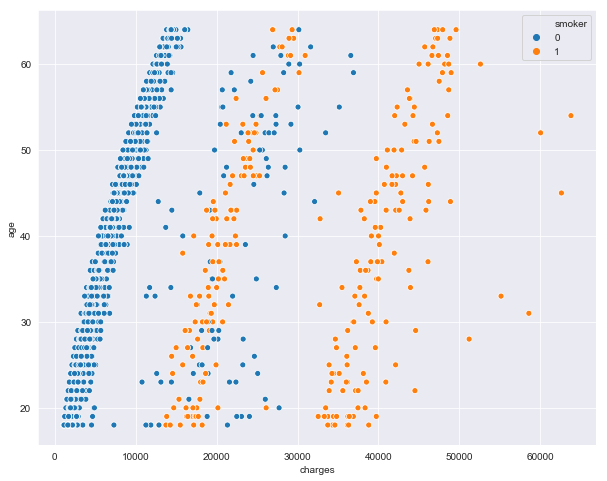

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='charges', y='age', hue='smoker',data=data)

- As age increases charges increases, it shows moderate correlation.

### Plotting bmi to charges with smoker as hue

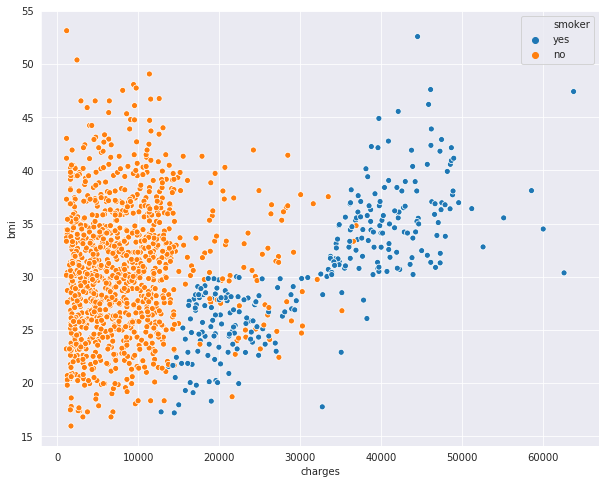

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='charges', y='bmi', hue='smoker', data=df)

- Higher BMI patients are charged more, shows moderate correlation.
- Smokers do show high correlation to charges.

### Plotting Number of children to charges with smoking as filter

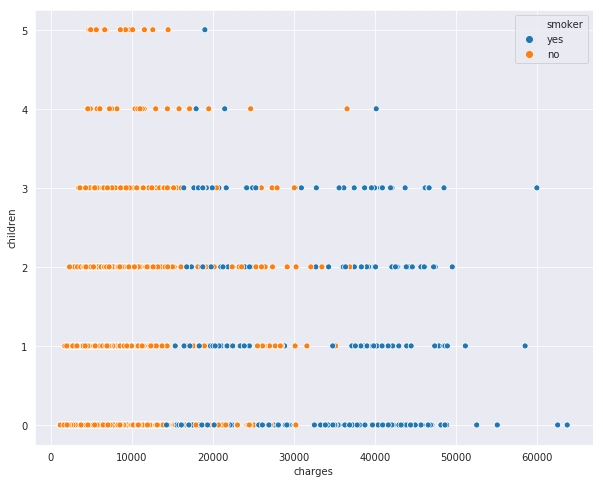

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='charges', y='children', hue='smoker', data=df)

- As number of children increases charges have dropped.
- Smokers are on the higher end of charges, it shows heavy correlation.

## Confirm our observation using correlation matrix

In [37]:
corr = data.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


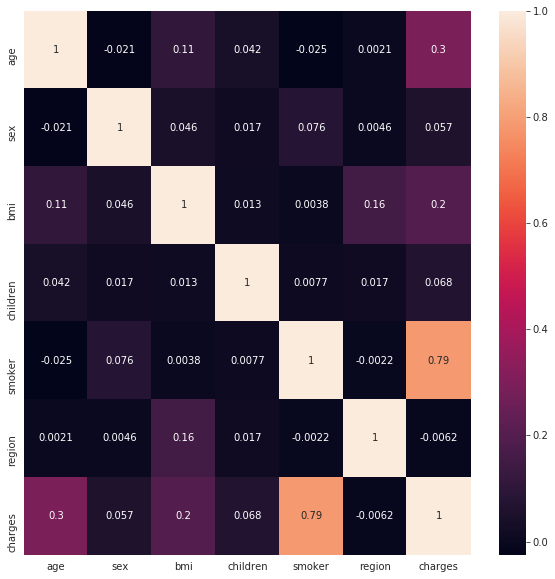

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

**Insights confirmed by correlation matrix:**
1. Smoker value show heavy correlation to charges.
2. Age have moderate correlation.
3. BMI shows little correlation.

**CAUTION:** Always remember "Correlation does not mean Causation"